# Plots - to do

1. What's the technique and flowchart
2. (table) dataset - explain features
3. auprc curve
4. Each feature level seperation of positive & neg data (power of each feature)
5. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from plotnine import *
import scipy
sns.set_palette("husl")
plt.figure(figsize=(10,7))
from scipy import stats


In [3]:
gt_param_df = pd.read_csv('./data_generated/gt_param_df_wlabel.csv')
gt_param_df = gt_param_df.drop(columns = ['IsKinase', 'IsTF'])
print(gt_param_df.shape)
gt_param_df.head()

(453455, 23)


,Gene,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Clustering_coeff,...,NumOfTFNeighbors,Centrality_coeff,NeighborMeanBreadth,NeighborMeanZscore,NeighborMedianBreadth,NeighborMedianZscore,Description,Level_enc,Pos,Label
0,ENSG00000187634,Stomach,4.720096,4.267317,-0.036851,3.423000,0.763231,0.904074,2.489289,0.047619,...,2,1.209951e-06,0.296060,-0.366241,0.261838,-0.380078,SAMD11,-1.00,0.0,U
1,ENSG00000188976,Stomach,44.847466,15.854806,-0.412520,42.380001,0.220056,0.353527,14.366420,0.253545,...,15,9.446877e-05,0.349456,-0.245143,0.309192,-0.260509,NOC2L,0.00,0.0,N
2,ENSG00000187961,Stomach,11.037735,4.394696,-0.145059,10.360000,0.445682,0.398152,3.558246,0.333333,...,0,2.254576e-07,0.300836,-0.350367,0.274373,-0.335166,KLHL17,0.75,0.0,U
3,ENSG00000187583,Stomach,1.643722,1.750657,-0.314139,1.138000,0.682451,1.065057,1.040194,0.000000,...,1,5.063642e-07,0.470752,0.818392,0.284123,-0.294220,PLEKHN1,-1.00,0.0,U
4,ENSG00000187642,Stomach,0.612194,0.432204,-0.298348,0.489900,0.454039,0.705991,0.274874,0.000000,...,0,0.000000e+00,0.311978,-0.253442,0.311978,-0.253442,PERM1,0.00,0.0,N


In [4]:
feats = ['MeanExp', 'SDofExp', 'ZScore', 'MedianExp',
       'Breadth', 'CV', 'MAD', 'Centrality_coeff', 'Clustering_coeff',
        'NumOfKinaseNbs', 'NumOfNeighbors',
       'NumOfTFNeighbors',  'NeighborMeanBreadth',
       'NeighborMeanZscore','NeighborMedianBreadth',
         'NeighborMedianZscore']

len(feats)

16

In [4]:
gt_param_df_pn = gt_param_df[gt_param_df['Label']!='U']
gt_param_df_pn = gt_param_df_pn[gt_param_df_pn['Tissue']!='Pituitary']

# gt_param_df_pn = gt_param_df_pn[gt_param_df_pn['Description'].isin(old_genes)]
pn_genes = (set(gt_param_df_pn[gt_param_df_pn['Label'] ==
                               'P']['Gene'].tolist()))& (set(gt_param_df_pn
                                                             [gt_param_df_pn['Label'] =='N']['Gene'].tolist()))
pn_tissues = (set(gt_param_df_pn[gt_param_df_pn['Label'] ==
                               'P']['Tissue'].tolist())) & (set(gt_param_df_pn
                                                             [gt_param_df_pn['Label'] =='N']['Tissue'].tolist()))
gt_param_df_pn = gt_param_df_pn[gt_param_df_pn['Tissue'].isin(pn_tissues)]

gt_param_df_pn = gt_param_df_pn[gt_param_df_pn['Gene'].isin(pn_genes)]
gt_param_df_pn.shape

(11074, 23)

In [5]:
gt_param_df_pn.columns

Index(['Gene', 'Tissue', 'MeanExp', 'SDofExp', 'ZScore', 'MedianExp',
       'Breadth', 'CV', 'MAD', 'Clustering_coeff', 'NeighborList',
       'NumOfKinaseNbs', 'NumOfNeighbors', 'NumOfTFNeighbors',
       'Centrality_coeff', 'NeighborMeanBreadth', 'NeighborMeanZscore',
       'NeighborMedianBreadth', 'NeighborMedianZscore', 'Description',
       'Level_enc', 'Pos', 'Label'],
      dtype='object')

In [6]:
for f in ['MeanExp', 'SDofExp', 'ZScore', 'MedianExp',
       'Breadth', 'CV', 'MAD', 'Centrality_coeff', 'Clustering_coeff',
        'NumOfKinaseNbs', 'NumOfNeighbors',
       'NumOfTFNeighbors',  'NeighborMeanBreadth',
       'NeighborMeanZscore']:
    p = gt_param_df_pn[gt_param_df_pn['Label'] == 'P'][f].tolist()
    n = gt_param_df_pn[gt_param_df_pn['Label'] == 'N'][f].tolist()
    print()
    print(f,',',scipy.stats.mannwhitneyu(n,p, use_continuity=True, alternative='greater')[1])


MeanExp , 1.0

SDofExp , 1.0

ZScore , 1.0

MedianExp , 1.0

Breadth , 0.9999985304211333

CV , 3.5397297934126014e-154

MAD , 1.0

Centrality_coeff , 0.9999999999999989

Clustering_coeff , 0.9999999999429332

NumOfKinaseNbs , 0.9999999999993213

NumOfNeighbors , 1.0

NumOfTFNeighbors , 1.0

NeighborMeanBreadth , 1.2881822083382552e-53

NeighborMeanZscore , 1.1453052546932957e-15


In [7]:
t = gt_param_df_pn[['Tissue', 'Label','Gene']].groupby(['Tissue',
                                                    'Label']).count().reset_index()
t = t.pivot(index='Tissue', columns='Label', values='Gene').fillna(0)
more50tissues = t[t['P'] > 50].reset_index()['Tissue'].tolist()

In [8]:
features = [ 'MeanExp', 'SDofExp','ZScore',
       'Breadth', 'CV', 'MAD', 'Centrality_coeff', 'Clustering_coeff', 'NumOfNeighbors',
       'NumOfTFNeighbors', 'NeighborMeanBreadth',
       'NeighborMeanZscore']
for feature in features:
    
    for tissue in more50tissues:
        table = gt_param_df_pn[gt_param_df_pn['Tissue']== tissue]
        w,pval = scipy.stats.mannwhitneyu(table[table['Label'] == 'N'][feature].tolist(), 
                               table[table['Label'] == 'P'][feature].tolist(),
                                  alternative='greater')
        print(feature + ',' + tissue + ',' + str(pval))
    

MeanExp,Brain,1.0
MeanExp,Esophagus,0.9999967472784024
MeanExp,Heart,1.0
MeanExp,Liver,1.0
MeanExp,Lung,1.0
MeanExp,Muscle,1.0
MeanExp,Skin,1.0
MeanExp,Testis,1.0
SDofExp,Brain,1.0
SDofExp,Esophagus,0.9980295334288551
SDofExp,Heart,1.0
SDofExp,Liver,1.0
SDofExp,Lung,1.0
SDofExp,Muscle,1.0
SDofExp,Skin,1.0
SDofExp,Testis,0.9999999998985977
ZScore,Brain,0.7145477436014178
ZScore,Esophagus,0.9845072986519783
ZScore,Heart,0.9461429422244435
ZScore,Liver,0.9999314646246592
ZScore,Lung,1.0
ZScore,Muscle,0.2152402774513203
ZScore,Skin,1.0
ZScore,Testis,0.9998706961970482
Breadth,Brain,0.9999994125657715
Breadth,Esophagus,0.6088713904934581
Breadth,Heart,0.9999997989485527
Breadth,Liver,0.9999999999983386
Breadth,Lung,0.9999999999999187
Breadth,Muscle,0.9999829380906705
Breadth,Skin,1.0
Breadth,Testis,0.4821317042578247
CV,Brain,1.1526739332296521e-40
CV,Esophagus,2.0402282237538423e-08
CV,Heart,4.184462924769948e-20
CV,Liver,2.3229257120781335e-20
CV,Lung,7.195164625415823e-23
CV,Muscle,6.467

In [9]:
gt_param_df_pn.groupby(['Label']).mean().T

Label,N,P
MeanExp,39.736547,215.374999
SDofExp,31.493669,148.560003
ZScore,-0.129090,0.296348
MedianExp,31.565672,180.895882
Breadth,0.479202,0.516449
CV,1.357357,0.679316
MAD,19.867402,120.409742
Clustering_coeff,0.103618,0.107537
NumOfKinaseNbs,1.748329,2.174610
NumOfNeighbors,41.511609,56.008018


IndexError: list index out of range

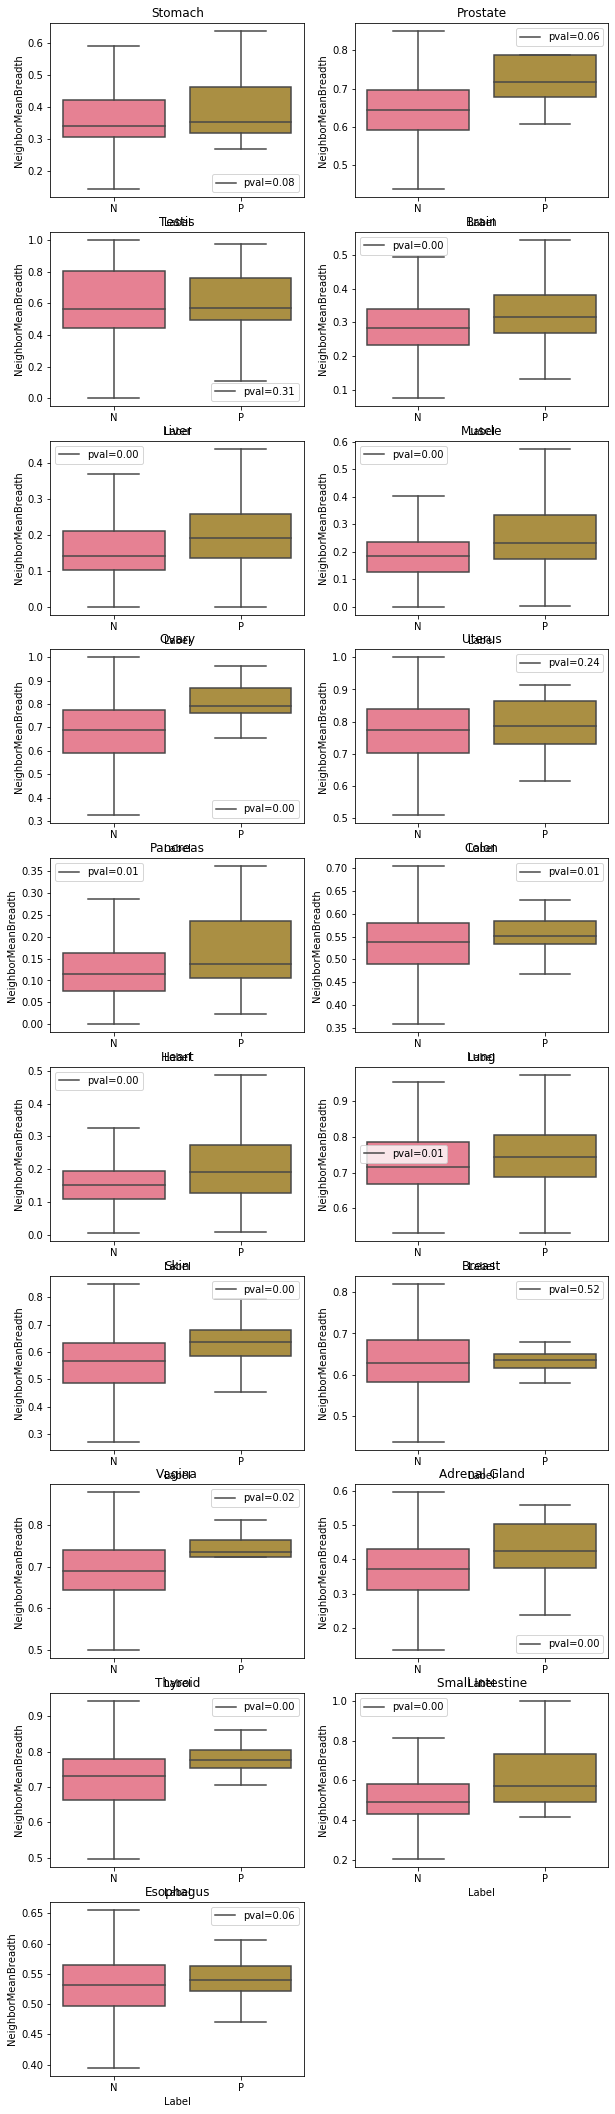

In [10]:
tissues = (gt_param_df_pn['Tissue'].drop_duplicates().tolist())

fig = plt.figure(figsize=(10,80))

for i in range(1, 21):
    tiss = tissues[i-1]
    tmp = gt_param_df_pn[gt_param_df_pn['Tissue']== tiss]
    ax = fig.add_subplot(21, 2, i)
    pval = scipy.stats.mannwhitneyu(tmp[tmp['Label'] == 'N']['NeighborMeanBreadth'].tolist(), 
                               tmp[tmp['Label'] == 'P']['NeighborMeanBreadth'].tolist(), 
                               use_continuity=True, alternative='less')[1]
    _=sns.boxplot(x="Label", y= 'NeighborMeanBreadth', data=tmp,showfliers=False,order = ['N','P'])
    _.legend(labels = ['pval={0:0.2f}'.format(pval)])  
    _.set_title(tiss)

14


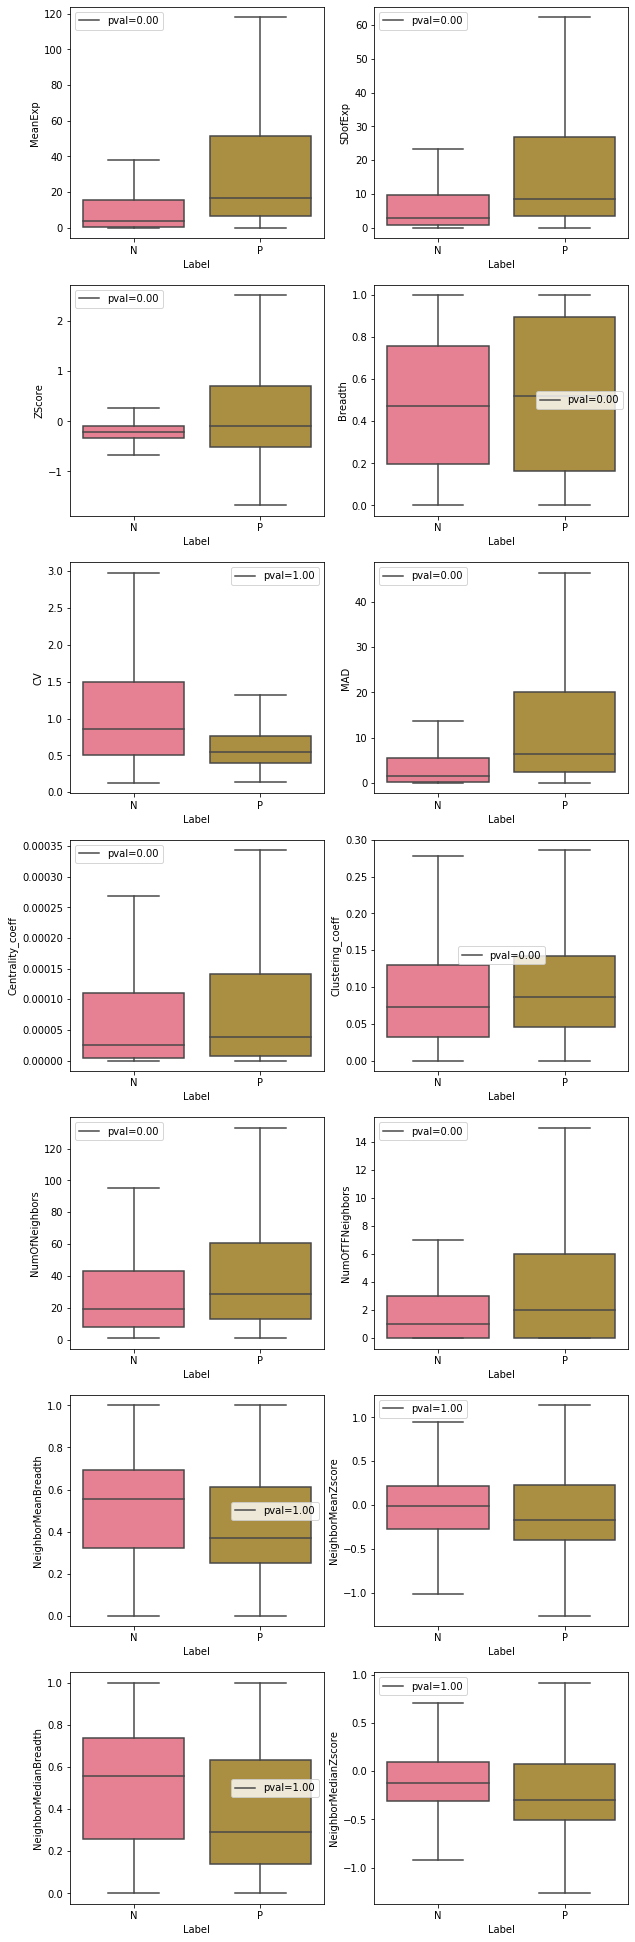

In [11]:
features = [ 'MeanExp', 'SDofExp','ZScore',
       'Breadth', 'CV', 'MAD', 'Centrality_coeff', 'Clustering_coeff', 'NumOfNeighbors',
       'NumOfTFNeighbors', 'NeighborMeanBreadth',
       'NeighborMeanZscore','NeighborMedianBreadth','NeighborMedianZscore']
print(len(features))

fig = plt.figure(figsize=(10,40))

for i in range(1, 15):
    feature = features[i-1]
    ax = fig.add_subplot(8, 2, i)
    pval = scipy.stats.mannwhitneyu(gt_param_df_pn[gt_param_df_pn['Label'] == 'N'][feature].tolist(), 
                               gt_param_df_pn[gt_param_df_pn['Label'] == 'P'][feature].tolist(), 
                               use_continuity=True, alternative='less')[1]
    _=sns.boxplot(x="Label", y= feature, data=gt_param_df_pn,showfliers=False, order = ['N','P'])
    _.legend(labels = ['pval={0:0.2f}'.format(pval)])    

In [12]:
mean_val_table = gt_param_df_pn.groupby(['Label','Tissue'])['MeanExp', 'SDofExp', 'ZScore', 'MedianExp',
       'Breadth', 'CV', 'MAD', 'Centrality_coeff', 'Clustering_coeff',
        'NumOfKinaseNbs', 'NumOfNeighbors',
       'NumOfTFNeighbors', 'NeighborMeanBreadth',
       'NeighborMeanZscore'].mean()
mean_val_table = mean_val_table.reset_index()
mean_val_table.head()

,Label,Tissue,MeanExp,SDofExp,ZScore,MedianExp,Breadth,CV,MAD,Centrality_coeff,Clustering_coeff,NumOfKinaseNbs,NumOfNeighbors,NumOfTFNeighbors,NeighborMeanBreadth,NeighborMeanZscore
0,N,Adrenal Gland,26.087487,14.300187,-0.253785,23.223574,0.348308,1.344447,9.828099,0.000339,0.108135,2.072464,50.881988,4.766046,0.373507,-0.172381
1,N,Brain,5.748519,8.423725,-0.267493,3.389224,0.276308,2.419214,2.330699,0.000214,0.120956,2.000000,43.866242,4.012739,0.289139,-0.318017
2,N,Breast,26.224219,21.600998,-0.080032,21.131429,0.590039,1.784902,11.037208,0.000168,0.105262,1.504000,36.258000,3.240000,0.634284,0.080288
3,N,Colon,72.211644,58.714659,-0.119972,65.389237,0.531052,1.531128,54.570812,0.000199,0.105246,1.414835,33.552198,3.156593,0.533711,-0.037327
4,N,Esophagus,59.842785,52.790947,-0.108650,52.362510,0.495534,1.500024,53.123074,0.000280,0.106241,1.500885,35.715044,2.909735,0.528786,-0.014520


In [13]:
features = [ 'MeanExp', 'SDofExp','ZScore', 'MedianExp',
       'Breadth', 'CV', 'MAD', 'Centrality_coeff', 'Clustering_coeff','NumOfKinaseNbs', 'NumOfNeighbors',
       'NumOfTFNeighbors', 'NeighborMeanBreadth',
       'NeighborMeanZscore']

mean_val_table = gt_param_df_pn.groupby(['Label','Tissue'])[ 'MeanExp', 'SDofExp','ZScore', 'MedianExp',
       'Breadth', 'CV', 'MAD', 'Centrality_coeff', 'Clustering_coeff','NumOfKinaseNbs', 'NumOfNeighbors',
       'NumOfTFNeighbors', 'NeighborMeanBreadth',
       'NeighborMeanZscore'].mean()
mean_val_table = mean_val_table.reset_index()
mean_val_table.head()

# features = ['NeighborMeanBreadth','NeighborMeanZscore']
for feature in features:
    w,pval = scipy.stats.wilcoxon(mean_val_table[mean_val_table['Label'] == 'N'][feature].tolist(), 
                               mean_val_table[mean_val_table['Label'] == 'P'][feature].tolist(),
                                  alternative='greater')
    print(feature + ':' + str(pval))
    

MeanExp:0.9987284422879693
SDofExp:0.9968948717047751
ZScore:0.9999340830555086
MedianExp:0.9991520550483014
Breadth:0.9999340830555086
CV:6.591694449141665e-05
MAD:0.9955483074420594
Centrality_coeff:0.6262499611159978
Clustering_coeff:0.049478682732594925
NumOfKinaseNbs:0.9912086023271266
NumOfNeighbors:0.9992614169023813
NumOfTFNeighbors:0.9993576471933541
NeighborMeanBreadth:0.9999224521136021
NeighborMeanZscore:0.9999340830555086


In [14]:
mean_val_melt = pd.melt(mean_val_table, id_vars=['Label','Tissue'])
mean_val_melt = mean_val_melt.rename(columns={'variable':'genetic_feature'})
mean_val_melt = mean_val_melt.sort_values(by=['Label','value'],ascending=False)
mean_val_melt.head()

,Label,Tissue,genetic_feature,value
29,P,Pancreas,MeanExp,2914.473975
143,P,Pancreas,MedianExp,2760.881094
257,P,Pancreas,MAD,1522.963872
67,P,Pancreas,SDofExp,1406.758622
19,P,Adrenal Gland,MeanExp,786.467426


In [16]:
mean_val_melt = mean_val_melt[mean_val_melt['genetic_feature'].isin(['NeighborMeanBreadth','NeighborMeanZscore'])]

Text(0.5, 1, 'NeighborMeanZscore')

<Figure size 3240x1440 with 0 Axes>

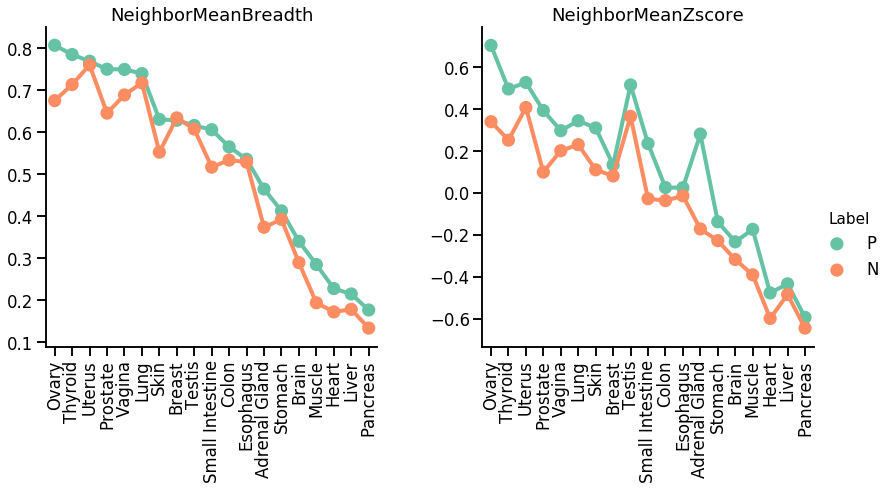

In [31]:
sns.set_context("talk")
fig = plt.figure(figsize=(45,20))

g = sns.catplot(x="Tissue", y='value', hue="Label", kind="point",col_wrap=2,
            ci=0,data=mean_val_melt,palette="Set2", hue_order = ['P','N'],col='genetic_feature',
               sharey=False, height=6)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)

# g.set_xticklabels(rotation=90)

g.axes[0].set_xlabel('')
g.axes[1].set_xlabel('')
g.axes[0].set_ylabel('')
g.axes[1].set_ylabel('')

g.axes[0].set_title("NeighborMeanBreadth")
g.axes[1].set_title("NeighborMeanZscore")

In [ ]:
features = [ 'MeanExp', 'SDofExp','ZScore',
       'Breadth', 'CV', 'MAD', 'Centrality_coeff', 'Clustering_coeff', 'NumOfNeighbors',
       'NumOfTFNeighbors', 'NeighborMeanBreadth',
       'NeighborMeanZscore']
print(len(features))

fig = plt.figure(figsize=(20, 40))

for i in range(1, 13):
    feature = features[i-1]
    print(feature)
    ax = fig.add_subplot(7, 2, i)
    w,pval = scipy.stats.wilcoxon(mean_val_table[mean_val_table['Label'] == 'N'][feature].tolist(), 
                               mean_val_table[mean_val_table['Label'] == 'P'][feature].tolist(),
                                  alternative='less')
    print(pval)
    mean_val_table = mean_val_table.sort_values(by=[feature],ascending=False)
    tissue_order = mean_val_table[mean_val_table['Label']=='P']['Tissue'].tolist()
    ax = sns.catplot(x="Tissue", y=feature, hue="Label", kind="point",
            ci=0,data=gt_param_df_pn,palette="Set2",rotation =90,order=tissue_order, hue_order = ['P','N'])
#     ax.xticks(rotation=90)
    
    
#     _.legend(labels = ['pval={0:0.2f}'.format(pval)])    
#     plt.show()


In [ ]:
features = ['ZScore',
       'Breadth', 'CV', 'MAD', 'Centrality_coeff', 'Clustering_coeff', 'NumOfNeighbors',
       'NumOfTFNeighbors', 'NeighborMeanBreadth',
       'NeighborMeanZscore']
print(len(features))

fig = plt.figure(figsize=(10,40))
# fig.suptitle('Feature level comparison - P vs N',fontsize=20)

for i in range(1, 11):
    feature = features[i-1]
    ax = fig.add_subplot(8, 2, i)
    p = gt_param_df_pn[gt_param_df_pn['Label'] == 'P'][feature].tolist()
    n = gt_param_df_pn[gt_param_df_pn['Label'] == 'N'][feature].tolist()
    if feature == 'CV':
        pval = scipy.stats.mannwhitneyu(p,n, 
                               use_continuity=True, alternative='less')[1]
        
    else:
        pval = scipy.stats.mannwhitneyu(p,n, 
                               use_continuity=True, alternative='greater')[1]
    
    _=sns.boxplot(x="Label", y= feature, data=gt_param_df_pn,showfliers=False)
    _.legend(labels = ['pval={0:0.2f}'.format(pval)], loc="upper left")    
    


In [3]:
import pandas as pd
import numpy as np
import pickle

In [4]:
tiss_network = pickle.load( open( "./data_generated/network_generated/all_tissue_network.p", "rb" ) )
tiss_network = tiss_network[['Gene1', 'Gene2', 'Ratio_val',
       'Tissue']]
tiss_network = tiss_network[tiss_network['Ratio_val']>=0.25]
tiss_network.head()

,Gene1,Gene2,Ratio_val,Tissue
0,ENSG00000165092,ENSG00000165092,0.497326,Small Intestine
1,ENSG00000158528,ENSG00000184009,0.256684,Small Intestine
2,ENSG00000122862,ENSG00000026508,0.374332,Small Intestine
3,ENSG00000141738,ENSG00000141736,0.438503,Small Intestine
4,ENSG00000149269,ENSG00000141736,0.368984,Small Intestine


In [10]:
tiss_network.shape[0]

8124694

In [8]:
tissues = tiss_network['Tissue'].drop_duplicates().tolist()
len(tissues)

30

In [15]:
inter_count = []
gene_count = []
for tiss in tissues:
    print(tiss)
    temp_df = tiss_network[tiss_network['Tissue']==tiss]
    inter_count.append(temp_df.shape[0])
    gl = set(temp_df['Gene1'].tolist() + temp_df['Gene2'].tolist())
    gene_count.append(len(list(gl)))
    
    

In [20]:
print(np.min(inter_count))
print(np.max(inter_count))
print(np.mean(inter_count))

87259
342339
270823.13333333336


## Creating Zscore per tissue plots

In [5]:
tissue_loov_df = pd.read_csv('./data_generated/tissue_loov_prob.csv')
tissue_loov_df.head()

,Gene,Tissue,Label,Probability,pct_rank,Description
0,ENSG00000187634,Stomach,U,0.519816,0.441200,SAMD11
1,ENSG00000188976,Stomach,N,0.538279,0.455074,NOC2L
2,ENSG00000187961,Stomach,U,0.695232,0.586020,KLHL17
3,ENSG00000187583,Stomach,U,0.161186,0.148058,PLEKHN1
4,ENSG00000187642,Stomach,N,0.265273,0.244913,PERM1


In [6]:
gt_param_df = pd.read_csv('./data_generated/gt_param_df_wlabel.csv')
gt_param_df_short = gt_param_df[['Gene','Tissue','ZScore']]
gt_param_df_short['zscore_pct_rank'] = gt_param_df_short.groupby('Tissue')['ZScore'].rank(ascending = True, pct = True)
gt_param_df_short.head()

/cmlscratch/gowthami/Anaconda3/envs/torch_projects/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Gene,Tissue,ZScore,zscore_pct_rank
0,ENSG00000187634,Stomach,-0.036851,0.848309
1,ENSG00000188976,Stomach,-0.412520,0.227537
2,ENSG00000187961,Stomach,-0.145059,0.723771
3,ENSG00000187583,Stomach,-0.314139,0.404400
4,ENSG00000187642,Stomach,-0.298348,0.435386


In [7]:
tissue_loov_df = tissue_loov_df.merge(gt_param_df_short, left_on=['Gene','Tissue'], right_on= ['Gene','Tissue'])
print(tissue_loov_df.shape)

(453455, 8)


In [8]:
temp = tissue_loov_df[tissue_loov_df['pct_rank']>0.95]
print(temp.shape)
temp.head()

(22687, 8)


,Gene,Tissue,Label,Probability,pct_rank,Description,ZScore,zscore_pct_rank
81,ENSG00000049245,Stomach,U,0.967447,0.987381,VAMP3,-0.576032,0.057413
85,ENSG00000116288,Stomach,U,0.949501,0.964323,PARK7,-0.458585,0.162526
86,ENSG00000116285,Stomach,U,0.959895,0.979123,ERRFI1,0.104055,0.906911
101,ENSG00000054523,Stomach,U,0.972664,0.992865,KIF1B,-0.606187,0.039905
109,ENSG00000120948,Stomach,U,0.952467,0.969411,TARDBP,-0.443398,0.182479


In [10]:
fugue_ranks = temp[temp['Label']=='P']['pct_rank'].tolist()
zscore_ranks = temp[temp['Label']=='P']['zscore_pct_rank'].tolist()
scipy.stats.wilcoxon(fugue_ranks, zscore_ranks, zero_method='wilcox',alternative='greater')[1]



5.176711806825558e-94

NameError: name 'tissue' is not defined

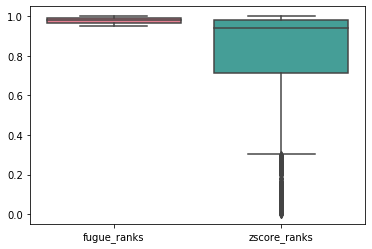

In [11]:
ranks  = [fugue_ranks,zscore_ranks]

names = ['fugue_ranks', 'zscore_ranks']
ax = sns.boxplot(data=ranks,palette="husl")
ax.set(xticklabels=names)
plt.xlabel(str(tissue))

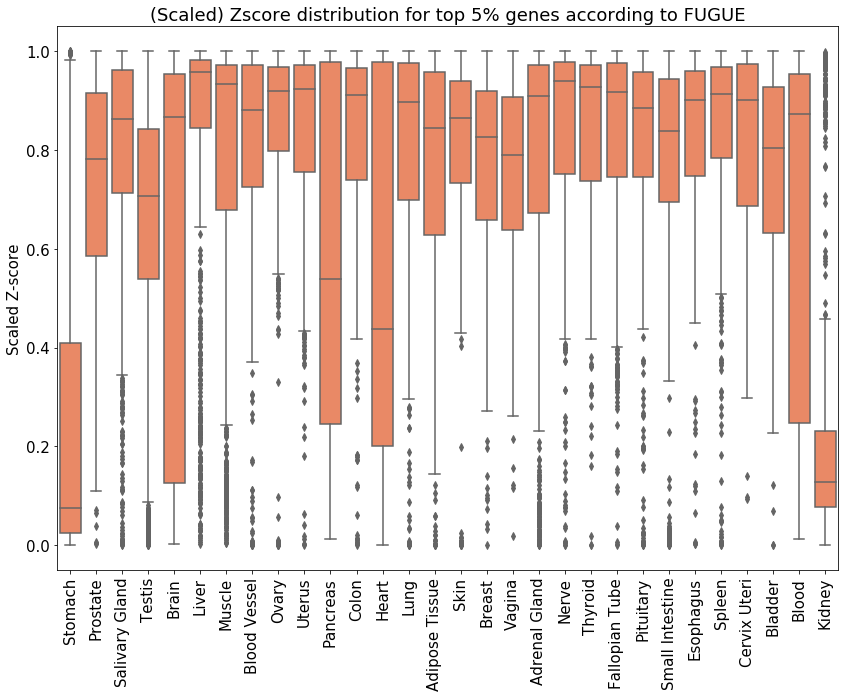

In [20]:
plt.figure(figsize=(14,10))

plt.title('(Scaled) Zscore distribution for top 5% genes according to FUGUE',fontsize=18)

sns.boxplot(x="Tissue", y="zscore_pct_rank", data=temp,color='coral')
plt.tick_params(labelsize=15)
plt.xlabel('',fontsize = 50)
plt.ylabel('Scaled Z-score',fontsize = 15)

plt.xticks(rotation=90)
plt.show()